<h2>Pandas Tutorial</h2>
<h3>
IT6773 <br>
Linh Le <br> 
Department of Information Technology <br> 
Kennesaw State University <br> 
</h3>

<h3> Introduction </h3>

Recall the example of credit rating in our introduction, the data needed to model problem may look like below

<div>
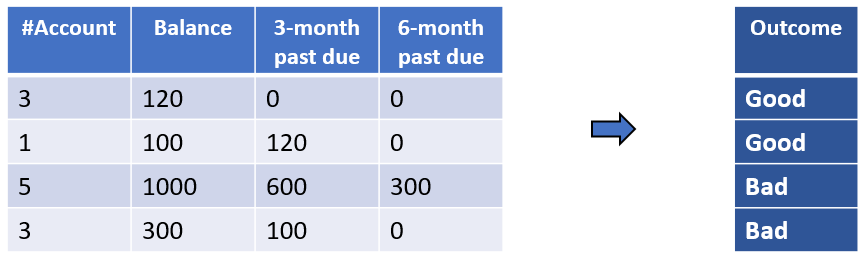
</div>

In this case, the input data has a 2D structure (similar to tables in relational databases), and the target data has a 1D structure. Please note that this 2D refers to the structure of the data and is different from the dimensionality of the input data space, which is 4 in this case (meaning the input data has four features).

In practice, data you receive for a project is almost never as clean and ready for analysis as in this example. You need to do a lot of preprocessing (e.g. add/remove features, clean coded values, dealing with missing values, merge multiple data sources...) for raw data to become modeling-ready. For that purpose, in this module, we are going to learn <b>Pandas</b> - a Python package for data manipulation. Pandas can also be used to explore data as we will be doing by the end of this module.

In short, we use pandas for these purposes:
- Loading data
- Manipulating data (i.e. preprocessing)
- Exploring data (some calls it preliminary analysis)

<h3> Pandas Data Structure </h3>

1. Series: 1D array like structure (can also be called vector). The outcome data in the credit rating example can be stored in a Pandas series. Another example is that you can store daily close price of a stock in an 1D series:
    - 129 128.5 129.7 130 132.4 132.5 133 ...
2. DataFrame: 2D structure. The input data in the credit rating example can be stored in a Pandas DataFrame
    - Probably most (if not all) datasets with which you will be working in this course will be a DataFrame.
    - Unless you would like to work with time series, signals, or images
3. Panel: 3D structure. We won't likely work with this structure for this course. For image data, we will be using Numpy instead.

<h3> Working with Pandas DataFrame </h3>

You can always create a Series or DataFrame from scratches, please follow https://www.tutorialspoint.com/python_pandas/python_pandas_series.htm and https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.htm for how to do that. In practice, we rarely create datasets. Instead, we receive them from some sources and need to <b>load</b> them. Let's begin writing some Python code on how to do this.

<h4> Loading Data </h4>

First, import pandas and alias it as <b>pd</b> (so it's more convenient to refer to the module)

In [1]:
import pandas as pd

Usually data is stored in a comma-delimited file - *.csv. We use <b>read_csv()</b> to do this. The data in this example is the iris data - a very classic dataset in statistics. The data has four feature: sepal width, sepal length, petal width, and petal length. It also has a column for class of the flowers: setosa, versicolor, and virginica. PLease open the iris.csv file to see how comma-delimited data is stored.

In [2]:
iris = pd.read_csv('iris.csv') #read the data
iris #display the data

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Note that it's not necessary for the file to have csv extension, or data fields to be separated by commas to use read_csv(). We can use the function to read any extension with any delimiter, as long as the file is plain text (i.e. you can open it using a text editor like notepad). The iris data also has feature (column) names come in the file. Some data files don't have that, and pandas will mistake the first row in the file as column names. 

All of this can be fixed by specifying some more options for read_csv()
- sep: delimiter, can be set to other character (default is comma)
- header: column names, can be set to none so pandas doesn't try to read column names from input files

Let's try loading the wine data. The file extension is .data, it has no column names, and is using "|" as delimiter. Please open the file to see how it actually looks

In [3]:
wine = pd.read_csv('wine.data', sep='|', header=None)
wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


For more information on read_csv(), please read https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

Also, please note that there are other ways to load data to your Python sessions. Certain datasets (e.g. cifar) are wrapped in a Python package which you can install. Others come in their own formats and codes to load them.

<h4> Slicing </h4>

Printing out a whole dataset doesn't give us much information. We probably want to look closer at certain rows or columns, or row/column combinations. To do this, we can <b>slice</b> the DataFrame. In general, we use DataFrame.loc() or DataFrame.iloc() to slice DataFrame. You need to provide two slicing conditions, one for row slicing and one for column slicing: 

<b>DataFrame.loc[{row condition} , {column condition}]</b>

or 

<b>DataFrame.iloc[{row condition} , {column condition}]</b>

In [4]:
iris.loc[:, ['sepalwidth','sepallength']] #getting all rows, sepalwidth and sepallength columns
iris.loc[:10, ['petalwidth','petallength']] #getting row 0 to 10, petalwidth and petallength columns
iris.loc[20:30, ['petallength','sepalwidth']] #getting row 20 to 30, petallength and sepalwidth columns 
                                             #notice the columns appear in the order we listed them

iris.loc[140:,'class'] #getting rows 140 until the end, column 'class'

140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: class, dtype: object

In [5]:
#similarly for the wine data that has no column names
#we can now use range for both rows and columns
wine.loc[:, 0] #all rows, column 0
wine.loc[10:20, 5:8]  #rows 10 to 20, columns 5 to 8
wine.loc[[10,40,70], [1,5,8]] #rows 10, 40, 70, and columns 1, 5, 8

,1,5,8
10,14.10,105,0.22
40,13.56,117,0.34
70,12.29,103,0.37


In [6]:
#to use index for DataFrame like iris with column names, we need to use iloc(). The syntax is similar
iris.iloc[10:20, 2:4] #row 10 to 20, column 2 to 4
iris.iloc[[5,10,15],[0,2,4]] #row 5, 10, 15, anmd column 0, 2, 4 (index for sepallength, petallength, and class)
iris.iloc[[10,5,0],[4,3,0]] #we can mix the order

,class,petalwidth,sepallength
10,setosa,0.2,5.4
5,setosa,0.4,5.4
0,setosa,0.2,5.1


Slicing with indices is not the only way. In many cases, we want to slice with certain conditions on the rows, and we can do that with loc() and iloc() also

In [7]:
iris.loc[iris['sepalwidth'] < 3, :] #rows whose sepalwidth < 3, all columns
iris.loc[iris['sepalwidth'] < 3, ['sepalwidth','class']] #rows whose sepalwidth < 3, column 'sepalwidth' and 'class'

,sepalwidth,class
8,2.9,setosa
41,2.3,setosa
53,2.3,versicolor
54,2.8,versicolor
55,2.8,versicolor
57,2.4,versicolor
58,2.9,versicolor
59,2.7,versicolor
60,2.0,versicolor
62,2.2,versicolor


In [8]:
#note: you can access a single column without loc() or iloc() by DataFrame['column name']
#the result is a series, example:
iris['sepalwidth']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepalwidth, Length: 150, dtype: float64

we can combine conditions, <b>'&'</b> for <b>and</b>, and <b>'|'</b> for <b>or</b>. Remember to wrap each condition in parentheses <b>()</b>

In [9]:
#rows whose sepalwidth < 3 and petalwidth > 1, and all columns
iris.loc[(iris['sepalwidth'] < 3) & (iris['petalwidth'] > 1), :]

#rows whose sepalwidth > 2.5 and petalwidth < 1, and all sepalwidth, petalwidth, and class columns
iris.loc[(iris['sepalwidth'] > 2.5) & (iris['petalwidth'] < 1), ['sepalwidth','petalwidth','class']]

#rows whose class is setosa, and all columns
iris.loc[iris['class']=='setosa', :]

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [10]:
#similarly for the wine data
wine.loc[(wine[1] < 14) & (wine[3] > 2.75), 3:8] #rows whose column 1 < 14 and column 3 > 2.75; columns 3 to 8

wine.loc[wine[0]==1, :] #rows where column 0 = 1 and all columns

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


Note that slicing with loc() or iloc() always returns a DataFrame. Beside viewing, we can always store the new DataFrame in a new variable. Remember that no slicing takes effect unless you store them somewhere. 

In [21]:
iris_subset = iris.loc[(iris['sepalwidth'] > 2.5) & (iris['petalwidth'] < 1), ['sepalwidth','petalwidth','class']]
iris_subset

,sepalwidth,petalwidth,class
0,3.5,0.2,setosa
1,3.0,0.2,setosa
2,3.2,0.2,setosa
3,3.1,0.2,setosa
4,3.6,0.2,setosa
5,3.9,0.4,setosa
6,3.4,0.3,setosa
7,3.4,0.2,setosa
8,2.9,0.2,setosa
9,3.1,0.1,setosa


<h4> Manipulating Rows and Columns </h4>

We can do quite many things with rows and columns in DataFrame besides slicing them. 

- We can apply basic math operations on numerics column. These operations are applied on rows separately

In [11]:
iris['sepallength'] + 1 #add 1 to every row's sepallength, the result is a Series, since iris['sepallength'] returns a Series
iris['petallength'] * 3 #multiply all rows' petallength by 3

0       4.2
1       4.2
2       3.9
3       4.5
4       4.2
       ... 
145    15.6
146    15.0
147    15.6
148    16.2
149    15.3
Name: petallength, Length: 150, dtype: float64

- Changing the data without doing anything else is not much useful... We can surely store new data somewhere

In [12]:
spl1 = iris['sepallength'] + 1 #store the new sepallength in a Series named spl1
spl1

0      6.1
1      5.9
2      5.7
3      5.6
4      6.0
      ... 
145    7.7
146    7.3
147    7.5
148    7.2
149    6.9
Name: sepallength, Length: 150, dtype: float64

In [13]:
#even as a new column in the DataFrame
iris['sepallength1'] = iris['sepallength'] + 1
iris

,sepallength,sepalwidth,petallength,petalwidth,class,sepallength1
0,5.1,3.5,1.4,0.2,setosa,6.1
1,4.9,3.0,1.4,0.2,setosa,5.9
2,4.7,3.2,1.3,0.2,setosa,5.7
3,4.6,3.1,1.5,0.2,setosa,5.6
4,5.0,3.6,1.4,0.2,setosa,6.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,7.7
146,6.3,2.5,5.0,1.9,virginica,7.3
147,6.5,3.0,5.2,2.0,virginica,7.5
148,6.2,3.4,5.4,2.3,virginica,7.2


In [14]:
#or even overwrite current columns. I highly recommend against doing this. We should always keep our original data somewhere
iris['sepallength1'] = iris['sepallength1'] / 2
iris

,sepallength,sepalwidth,petallength,petalwidth,class,sepallength1
0,5.1,3.5,1.4,0.2,setosa,3.05
1,4.9,3.0,1.4,0.2,setosa,2.95
2,4.7,3.2,1.3,0.2,setosa,2.85
3,4.6,3.1,1.5,0.2,setosa,2.80
4,5.0,3.6,1.4,0.2,setosa,3.00
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3.85
146,6.3,2.5,5.0,1.9,virginica,3.65
147,6.5,3.0,5.2,2.0,virginica,3.75
148,6.2,3.4,5.4,2.3,virginica,3.60


Note: when adding new columns to a DataFrame, you have to make sure the new column has the same number of rows as the DataFrame. Mismatching sizes will NOT result in errorsm however if the new column is larger, it will be truncated, and if the new column is smaller, rows with unassigned values will be <b?NaN</b> (Not a Number)

Furthermore, values in the new column is added to the DataFrame in the exact order they appear (in terms of rows). You need to make sure the rows in the new column and in the DataFrame are in the same order.

In [15]:
iris['newcolumn1'] = wine.loc[:,2] #the wine data has 177 rows, iris has 150 rows, 
                                   #newcolumn1 only contains values until the 150th row in column 2 of wine

iris['newcolumn2'] = wine.loc[:50,0] #now we only assign the first 50 values of column 0 in wine to iris newcolumn2
                                     #anything after row 50 in newcolumn2 becomes NaN

iris

,sepallength,sepalwidth,petallength,petalwidth,class,sepallength1,newcolumn1,newcolumn2
0,5.1,3.5,1.4,0.2,setosa,3.05,1.71,1.0
1,4.9,3.0,1.4,0.2,setosa,2.95,1.78,1.0
2,4.7,3.2,1.3,0.2,setosa,2.85,2.36,1.0
3,4.6,3.1,1.5,0.2,setosa,2.80,1.95,1.0
4,5.0,3.6,1.4,0.2,setosa,3.00,2.59,1.0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3.85,3.57,NaN
146,6.3,2.5,5.0,1.9,virginica,3.65,5.04,NaN
147,6.5,3.0,5.2,2.0,virginica,3.75,4.61,NaN
148,6.2,3.4,5.4,2.3,virginica,3.60,3.24,NaN


Besides basic math operations, we can also apply functions like log(), exp(), sqrt(), sin(), cos()... These functions however come from <b>Numpy</b>, and we first need to import the package. After that, we can use the functions on columns (which are Series) directly. Mathematical functions will return an array of the same size as input, and can be directly assigned to the DataFrame as a new column

In [3]:
import numpy as np #import numpy and alias it as np

In [20]:
iris['log_sepallength'] = np.log(iris['sepallength'])
iris['sqrt_sepalwidth'] = np.sqrt(iris['sepalwidth'])
iris['sin_petallength'] = np.sin(iris['petallength'])
iris

,sepallength,sepalwidth,petallength,petalwidth,class,sepallength1,newcolumn1,newcolumn2,log_sepallength,sqrt_sepalwidth,sin_petallength
0,5.1,3.5,1.4,0.2,setosa,3.05,1.71,1.0,1.629241,1.870829,0.985450
1,4.9,3.0,1.4,0.2,setosa,2.95,1.78,1.0,1.589235,1.732051,0.985450
2,4.7,3.2,1.3,0.2,setosa,2.85,2.36,1.0,1.547563,1.788854,0.963558
3,4.6,3.1,1.5,0.2,setosa,2.80,1.95,1.0,1.526056,1.760682,0.997495
4,5.0,3.6,1.4,0.2,setosa,3.00,2.59,1.0,1.609438,1.897367,0.985450
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3.85,3.57,NaN,1.902108,1.732051,-0.883455
146,6.3,2.5,5.0,1.9,virginica,3.65,5.04,NaN,1.840550,1.581139,-0.958924
147,6.5,3.0,5.2,2.0,virginica,3.75,4.61,NaN,1.871802,1.732051,-0.883455
148,6.2,3.4,5.4,2.3,virginica,3.60,3.24,NaN,1.824549,1.843909,-0.772764


What if we want to apply different things to different rows of the DataFrame? The answer is quite simple. It is just a matter of slicing (by rows) then applying whatever you want

In [23]:
iris.loc[iris['sepallength'] < 5, 'sepallength'] + 1 #retrieve rows that has sepallength < 5, 
                                                     #then add 1 to their sepallength value

1      5.9
2      5.7
3      5.6
6      5.6
8      5.4
9      5.9
11     5.8
12     5.8
13     5.3
22     5.6
24     5.8
29     5.7
30     5.8
34     5.9
37     5.9
38     5.4
41     5.5
42     5.4
45     5.8
47     5.6
57     5.9
106    5.9
Name: sepallength, dtype: float64

Again, changing without storing the result is not too useful. We can create new columns to store the new data. A common usage of this is to categorize numeric columns, or convert class columns to numbers

<h5>Categorize Numeric Columns</h5>

Suppose we want to create a new column <i>sepalgroup</i> that represents different groups of sepallength. Rows with sepallength < 5.5 belong to group "short", and they belong to "long" otherwise

In [33]:
iris.loc[iris['sepallength'] < 5.5, 'sepalgroup'] = 'short' #slice the rows with sepallength < 5.5 and assign their group
iris.loc[iris['sepallength'] >= 5.5, 'sepalgroup'] = 'long' #slice the remaining rows and assign their group
iris.loc[:,['sepallength','sepalgroup']]

,sepallength,sepalgroup
0,5.1,short
1,4.9,short
2,4.7,short
3,4.6,short
4,5.0,short
...,...,...
145,6.7,long
146,6.3,long
147,6.5,long
148,6.2,long


<h5>Convert Categories to Numbers</h5>

It is also quite often we want to convert categories into numbers. However, you have to make sure the order in the numerical values makes sense. 

For example, categories like "low", "medium", "high" make sense when being convert to 1, 2, 3 because in some sense, 1 < 2 is equivalent "low" < "medium". However, groups like "Europe", "Asia", "Africa"... don't have any inherent order. If you convert them to 1, 2, 3, does 1 < 2, or "Europe" < "Asia" make sense? In such cases, we use something called "dummy variables", however, they are for discussion on another day.

In this example, we will convert three groups of flowers to 1, 2, 3, purely for demonstration. Remember that it doesn't really make sense to do this, because the groups have no inherent order.

In [36]:
iris.loc[iris['class'] == 'setosa', 'numericclass'] = 1 #similar to before, slice, 
                                                        #then assign value to the new column of the sliced group
iris.loc[iris['class'] == 'versicolor', 'numericclass'] = 2
iris.loc[iris['class'] == 'virginica', 'numericclass'] = 3
iris.loc[:, ['class','numericclass']]

,class,numericclass
0,setosa,1.0
1,setosa,1.0
2,setosa,1.0
3,setosa,1.0
4,setosa,1.0
...,...,...
145,virginica,3.0
146,virginica,3.0
147,virginica,3.0
148,virginica,3.0


<h3>Descriptive Statistics</h3>

Descriptive statistics refer to column-wise measurements like mean, standard deviation, min, max... (for numerical columns), and frequencies (for class columns). They are not the target of an analysis, but are quite important for preliminary analysis to gain some first insight of the data. 

If you don't remember the statistics, in term of a numeric column
- mean: average value of the column
- variance: measure how the values spread out from the mean
- standard deviation: squared root of the variance
- min/max: minimum and maximum value in the column
- x% percentile: sort values in the column from min to max, then the x% percentile is the value at the $x^{th}$% position
    - The 0% percentile is the min, 100% percentile is the max. We also call the 50% percentile the median

Pandas DataFrame comes with functions like <b>mean()</b>, <b>std()</b>, <b>min()</b>, <b>max()</b>... for these statistics

In [ ]:
iris = pd.read_csv('iris.csv') #I'm just rereading the data to remove all the columns created in previous steps

In [5]:
iris.mean(numeric_only=True) #mean of all columns, numeric_only option is to omit class columns from the result
iris.std(numeric_only=True) #standard deviation of all columns
iris.var(numeric_only=True) #variance of all columns
iris.min(numeric_only=True) #min of all columns
iris.median(numeric_only=True) #median of all columns
iris.max(numeric_only=True) #max of all columns

sepallength    7.9
sepalwidth     4.4
petallength    6.9
petalwidth     2.5
dtype: float64

In [6]:
iris.describe() #we can also use DataFrame.describe() to obtain all statistics
                #describe() also gives us some percentile values
                #remember, the 50% percentile is the median

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.describe(percentiles=[0.1,0.25,0.5,0.75,0.9]) #we can specify the percentile we want to display
                                                   #remember to divide the value by 100
                                                   #e.g. 10th percentile is equivalent to 0.1

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
10%,4.800000,2.500000,1.400000,0.200000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
90%,6.900000,3.610000,5.800000,2.200000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.loc[:100, ['petallength','petalwidth']].describe() #remember, sliced DataFrame is also a DataFrame
                                                        #so we can use describe() to get statistics for a subset of data
                                                        #in this case, we are applying describe() on the first 100 rows
                                                        #and on petallength and petalwidth

,petallength,petalwidth
count,101.000000,101.000000
mean,2.893069,0.801980
std,1.474738,0.588724
min,1.000000,0.100000
25%,1.500000,0.200000
50%,3.000000,1.000000
75%,4.400000,1.300000
max,6.000000,2.500000


In [11]:
iris['class'].value_counts() #to count frequency of classes, we must first slice the column first. 
                             #Then we can use value_counts()

versicolor    50
virginica     50
setosa        50
Name: class, dtype: int64

<h3>Basic Visualization</h3>

Besides descriptive statistics, visualization is also very useful for preliminary analysis. Pandas provide us some functions to plot data. These functions are provided by <b>matplotlib</b> though, so you need to have the package installed.

For numeric columns, we can use plots like histogram, density plot, boxplot,... I prefer the histogram because it shows the distribution with certain accuracy. Density plot is a smoothed histogram. Boxplot can be too abstract some times.

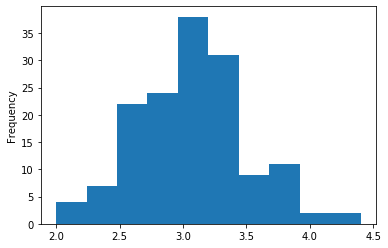

In [119]:
ax1 = iris['sepalwidth'].plot.hist() #histogram

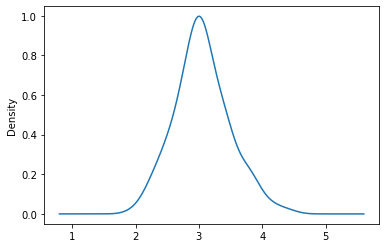

In [117]:
ax2 = iris['sepalwidth'].plot.density() #density plot

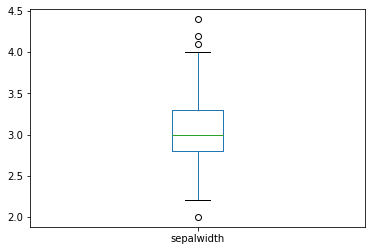

In [12]:
ax3 = iris['sepalwidth'].plot.box() #box plot

We can add some details like title and change the number of columns in histograms

Text(0, 0.5, 'Frequency')

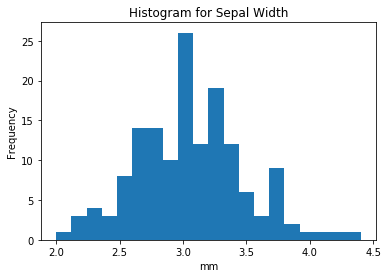

In [13]:
ax = iris['sepalwidth'].plot.hist(title='Histogram for Sepal Width', #plot title
                                  bins=20)       #change number of columns to 20 for better granularity in plot

ax.set_xlabel('mm')         #set label of horizontal axis
ax.set_ylabel('Frequency')  #set label of vertical axis

We can also slice the DataFrame and plot multiple histograms in one figure to compare them. Now we need to use the DataFrame.plot.hist() function

Text(0.5, 0, 'mm')

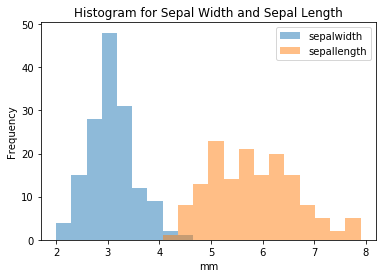

In [14]:
ax = iris.loc[:, ['sepalwidth','sepallength']].plot.hist(title='Histogram for Sepal Width and Sepal Length', 
                                                         bins=20, 
                                                         alpha=0.5) #transparency of the individual histograms, 
                                                                    #so we can see overlapping areas
ax.set_xlabel('mm')

Or we can plot each column in a subfigure

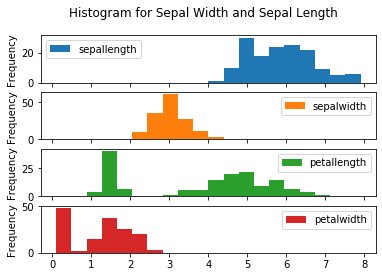

In [17]:
ax = iris.plot.hist(title='Histogram for Sepal Width and Sepal Length', 
                                                         bins=20, 
                                                         subplots=True) #set subplots to True to separate the histograms

Similarly for other plot types.

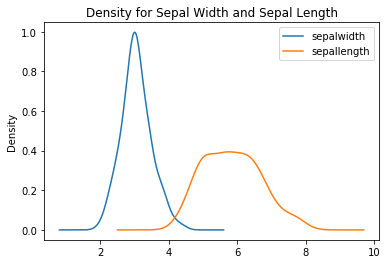

In [105]:
ax = iris.loc[:, ['sepalwidth','sepallength']].plot.density(title='Density for Sepal Width and Sepal Length')  

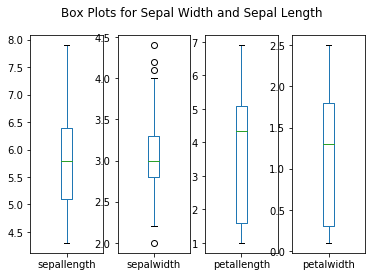

In [18]:
ax = iris.plot.box(title='Box Plots for Sepal Width and Sepal Length', subplots=True)  

For class columns, we can use bar chart, pie chart... just note that, bar chart or pie chart need to be plot from a frequency table output by value_counts(), not the original DataFrame

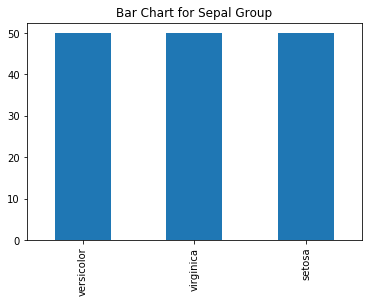

In [19]:
ax = iris['class'].value_counts().plot.bar(title='Bar Chart for Sepal Group')

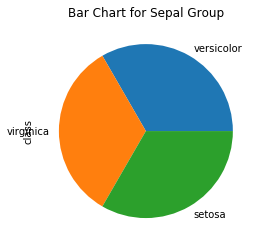

In [20]:
ax = iris['class'].value_counts().plot.pie(title='Bar Chart for Sepal Group')

Note: the pandas package and matplotlib package provide many different plotting functionalities. However this is not the focus of our module, as well as the course, so we only discuss them very briefly. Please read the documentation for matplotlib for more details if you are interested in visualization